In [13]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pulp import *
import seaborn as sn

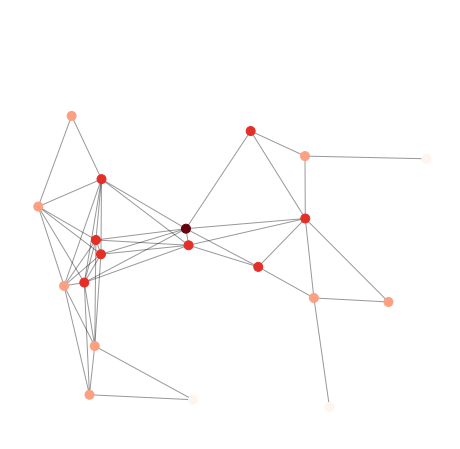

In [31]:
G = nx.random_geometric_graph(20, 0.3)
pos = nx.get_node_attributes(G, "pos")
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d
p = dict(nx.single_source_shortest_path_length(G, ncenter))
plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

In [32]:
ll = list()
for i in pos:
    ll.append(pos[i][0])
rr = list()
for i in pos:
    rr.append(pos[i][1])
    

In [33]:
ll[0]

0.68380665127113

In [34]:
rr[0]

0.6726663111494021

In [35]:
pos[0]

[0.68380665127113, 0.6726663111494021]

In [36]:
df = pd.DataFrame()
df['Left'] = ll
df['Right'] = rr

In [37]:
df

,Left,Right
0,0.683807,0.672666
1,0.408022,0.056351
2,0.090169,0.344442
3,0.390522,0.489035
4,0.684530,0.514806
5,0.549922,0.736099
6,0.165683,0.192269
7,0.108755,0.774337
8,0.396936,0.447144
9,0.568614,0.392455


In [38]:
df['coordinate'] = list(zip(df['Left'],df['Right']))
df['ID'] = df.index

In [39]:
df

,Left,Right,coordinate,ID
0,0.683807,0.672666,"(0.68380665127113, 0.6726663111494021)",0
1,0.408022,0.056351,"(0.4080222194840185, 0.056350545120639306)",1
2,0.090169,0.344442,"(0.09016890883621143, 0.3444417803889236)",2
3,0.390522,0.489035,"(0.39052161667162133, 0.48903503413317684)",3
4,0.684530,0.514806,"(0.6845296685827981, 0.5148064109734968)",4
5,0.549922,0.736099,"(0.5499219805753234, 0.7360991520384819)",5
6,0.165683,0.192269,"(0.16568277278782284, 0.19226858221261267)",6
7,0.108755,0.774337,"(0.10875461230289052, 0.7743372889481909)",7
8,0.396936,0.447144,"(0.3969360028862067, 0.44714391788982233)",8
9,0.568614,0.392455,"(0.5686137525077909, 0.39245543592520893)",9


In [40]:
import haversine as hs
from haversine import Unit

In [41]:
def dist_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [42]:
# parse location one by one to dist_from
for _,row in df.iterrows():
    df[row.ID]=df['coordinate'].apply(lambda x: dist_from(row.coordinate,x))

In [43]:
df.head()

,Left,Right,coordinate,ID,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,0.683807,0.672666,"(0.68380665127113, 0.6726663111494021)",0,0.00,75.08,75.43,38.48,17.55,16.47,...,70.16,61.96,70.87,33.29,39.97,46.97,62.35,74.45,56.13,89.40
1,0.408022,0.056351,"(0.4080222194840185, 0.056350545120639306)",1,75.08,0.00,47.70,48.15,59.53,77.21,...,44.44,52.23,37.42,93.18,43.77,60.18,48.08,68.93,66.94,28.42
2,0.090169,0.344442,"(0.09016890883621143, 0.3444417803889236)",2,75.43,47.70,0.00,37.07,68.75,67.16,...,5.61,15.58,80.29,105.53,68.53,88.99,13.46,23.40,31.73,31.41
3,0.390522,0.489035,"(0.39052161667162133, 0.48903503413317684)",3,38.48,48.15,37.07,0.00,32.82,32.69,...,31.71,24.88,63.71,68.76,40.10,59.18,24.38,40.95,27.02,53.67
4,0.684530,0.514806,"(0.6845296685827981, 0.5148064109734968)",4,17.55,59.53,68.75,32.82,0.00,28.80,...,63.18,57.69,53.41,37.21,22.47,32.71,56.88,73.24,56.93,77.16


In [44]:
distances_df=df.iloc[:,4:4183]
#distances_df.index=df.ID
distances_df.insert(0, 'ID', df.ID)

distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,75.08,75.43,38.48,17.55,16.47,78.57,64.93,40.57,...,70.16,61.96,70.87,33.29,39.97,46.97,62.35,74.45,56.13,89.40
1,1,75.08,0.00,47.70,48.15,59.53,77.21,30.90,86.49,43.47,...,44.44,52.23,37.42,93.18,43.77,60.18,48.08,68.93,66.94,28.42
2,2,75.43,47.70,0.00,37.07,68.75,67.16,18.89,47.85,35.97,...,5.61,15.58,80.29,105.53,68.53,88.99,13.46,23.40,31.73,31.41
3,3,38.48,48.15,37.07,0.00,32.82,32.69,41.40,44.59,4.71,...,31.71,24.88,63.71,68.76,40.10,59.18,24.38,40.95,27.02,53.67
4,4,17.55,59.53,68.75,32.82,0.00,28.80,67.93,70.23,32.85,...,63.18,57.69,53.41,37.21,22.47,32.71,56.88,73.24,56.93,77.16
5,5,16.47,77.21,67.16,32.69,28.80,0.00,74.04,49.24,36.35,...,62.41,52.32,80.55,48.80,50.05,61.13,53.70,61.96,43.05,86.33
6,6,78.57,30.90,18.89,41.40,67.93,74.04,0.00,65.03,38.27,...,18.07,29.83,66.56,105.05,61.55,81.43,25.86,42.16,46.98,13.78
7,7,64.93,86.49,47.85,44.59,70.23,49.24,65.03,0.00,48.48,...,47.00,35.53,108.13,97.97,83.84,101.36,39.74,27.09,19.57,78.58
8,8,40.57,43.47,35.97,4.71,32.85,36.35,38.27,48.48,0.00,...,30.44,25.43,59.65,69.57,37.40,57.04,24.14,42.60,30.25,50.05
9,9,33.69,41.42,53.47,22.53,18.74,38.27,50.03,66.47,20.03,...,47.87,45.12,43.96,55.21,17.58,37.02,43.24,62.62,49.54,58.58


In [45]:
dist_dict={}

In [46]:
#positions to be plotted
locations = dict( ( ID, (df.loc[ID, 'Left'], df.loc[ID, 'Right']) ) for ID in df.index)
locations

{0: (0.68380665127113, 0.6726663111494021),
 1: (0.4080222194840185, 0.056350545120639306),
 2: (0.09016890883621143, 0.3444417803889236),
 3: (0.39052161667162133, 0.48903503413317684),
 4: (0.6845296685827981, 0.5148064109734968),
 5: (0.5499219805753234, 0.7360991520384819),
 6: (0.16568277278782284, 0.19226858221261267),
 7: (0.10875461230289052, 0.7743372889481909),
 8: (0.3969360028862067, 0.44714391788982233),
 9: (0.5686137525077909, 0.39245543592520893),
 10: (0.13996097478794056, 0.3527689478778929),
 11: (0.16860271009045424, 0.46050294981232087),
 12: (0.7440717112345201, 0.038111017697513905),
 13: (0.9831003995672847, 0.6658715209491041),
 14: (0.7057344809040562, 0.3138281148071457),
 15: (0.889450836898076, 0.30369235871799494),
 16: (0.1810404206150512, 0.42436203301371456),
 17: (0.026520444314204195, 0.5449795623444649),
 18: (0.1823795786290534, 0.6144411341041319),
 19: (0.15272938896694777, 0.06899114211974033)}

In [47]:
distances_df

,ID,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,0.00,75.08,75.43,38.48,17.55,16.47,78.57,64.93,40.57,...,70.16,61.96,70.87,33.29,39.97,46.97,62.35,74.45,56.13,89.40
1,1,75.08,0.00,47.70,48.15,59.53,77.21,30.90,86.49,43.47,...,44.44,52.23,37.42,93.18,43.77,60.18,48.08,68.93,66.94,28.42
2,2,75.43,47.70,0.00,37.07,68.75,67.16,18.89,47.85,35.97,...,5.61,15.58,80.29,105.53,68.53,88.99,13.46,23.40,31.73,31.41
3,3,38.48,48.15,37.07,0.00,32.82,32.69,41.40,44.59,4.71,...,31.71,24.88,63.71,68.76,40.10,59.18,24.38,40.95,27.02,53.67
4,4,17.55,59.53,68.75,32.82,0.00,28.80,67.93,70.23,32.85,...,63.18,57.69,53.41,37.21,22.47,32.71,56.88,73.24,56.93,77.16
5,5,16.47,77.21,67.16,32.69,28.80,0.00,74.04,49.24,36.35,...,62.41,52.32,80.55,48.80,50.05,61.13,53.70,61.96,43.05,86.33
6,6,78.57,30.90,18.89,41.40,67.93,74.04,0.00,65.03,38.27,...,18.07,29.83,66.56,105.05,61.55,81.43,25.86,42.16,46.98,13.78
7,7,64.93,86.49,47.85,44.59,70.23,49.24,65.03,0.00,48.48,...,47.00,35.53,108.13,97.97,83.84,101.36,39.74,27.09,19.57,78.58
8,8,40.57,43.47,35.97,4.71,32.85,36.35,38.27,48.48,0.00,...,30.44,25.43,59.65,69.57,37.40,57.04,24.14,42.60,30.25,50.05
9,9,33.69,41.42,53.47,22.53,18.74,38.27,50.03,66.47,20.03,...,47.87,45.12,43.96,55.21,17.58,37.02,43.24,62.62,49.54,58.58


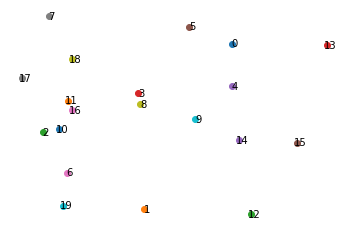

In [48]:
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
plt.gca().axis('off');

In [49]:
df1 = pd.DataFrame()
df1 = df
df1 = df1.drop(['Left'],axis=1)
df1 = df1.drop(['Right'],axis=1)
df1 = df1.drop(['coordinate'],axis=1)
df1 = df1.drop(['ID'],axis=1)

In [50]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00,75.08,75.43,38.48,17.55,16.47,78.57,64.93,40.57,33.69,70.16,61.96,70.87,33.29,39.97,46.97,62.35,74.45,56.13,89.40
1,75.08,0.00,47.70,48.15,59.53,77.21,30.90,86.49,43.47,41.42,44.44,52.23,37.42,93.18,43.77,60.18,48.08,68.93,66.94,28.42
2,75.43,47.70,0.00,37.07,68.75,67.16,18.89,47.85,35.97,53.47,5.61,15.58,80.29,105.53,68.53,88.99,13.46,23.40,31.73,31.41
3,38.48,48.15,37.07,0.00,32.82,32.69,41.40,44.59,4.71,22.53,31.71,24.88,63.71,68.76,40.10,59.18,24.38,40.95,27.02,53.67
4,17.55,59.53,68.75,32.82,0.00,28.80,67.93,70.23,32.85,18.74,63.18,57.69,53.41,37.21,22.47,32.71,56.88,73.24,56.93,77.16
5,16.47,77.21,67.16,32.69,28.80,0.00,74.04,49.24,36.35,38.27,62.41,52.32,80.55,48.80,50.05,61.13,53.70,61.96,43.05,86.33
6,78.57,30.90,18.89,41.40,67.93,74.04,0.00,65.03,38.27,50.03,18.07,29.83,66.56,105.05,61.55,81.43,25.86,42.16,46.98,13.78
7,64.93,86.49,47.85,44.59,70.23,49.24,65.03,0.00,48.48,66.47,47.00,35.53,108.13,97.97,83.84,101.36,39.74,27.09,19.57,78.58
8,40.57,43.47,35.97,4.71,32.85,36.35,38.27,48.48,0.00,20.03,30.44,25.43,59.65,69.57,37.40,57.04,24.14,42.60,30.25,50.05
9,33.69,41.42,53.47,22.53,18.74,38.27,50.03,66.47,20.03,0.00,47.87,45.12,43.96,55.21,17.58,37.02,43.24,62.62,49.54,58.58


In [51]:
distance = df1

In [52]:
type(df.ID[0])

numpy.int64

In [53]:

# get distance in a dictionary form
distances = dict( ((l1,l2), distance.iloc[l1, l2] ) for l1 in locations for l2 in locations if l1!=l2)
distances

{(0, 1): 75.08,
 (0, 2): 75.43,
 (0, 3): 38.48,
 (0, 4): 17.55,
 (0, 5): 16.47,
 (0, 6): 78.57,
 (0, 7): 64.93,
 (0, 8): 40.57,
 (0, 9): 33.69,
 (0, 10): 70.16,
 (0, 11): 61.96,
 (0, 12): 70.87,
 (0, 13): 33.29,
 (0, 14): 39.97,
 (0, 15): 46.97,
 (0, 16): 62.35,
 (0, 17): 74.45,
 (0, 18): 56.13,
 (0, 19): 89.4,
 (1, 0): 75.08,
 (1, 2): 47.7,
 (1, 3): 48.15,
 (1, 4): 59.53,
 (1, 5): 77.21,
 (1, 6): 30.9,
 (1, 7): 86.49,
 (1, 8): 43.47,
 (1, 9): 41.42,
 (1, 10): 44.44,
 (1, 11): 52.23,
 (1, 12): 37.42,
 (1, 13): 93.18,
 (1, 14): 43.77,
 (1, 15): 60.18,
 (1, 16): 48.08,
 (1, 17): 68.93,
 (1, 18): 66.94,
 (1, 19): 28.42,
 (2, 0): 75.43,
 (2, 1): 47.7,
 (2, 3): 37.07,
 (2, 4): 68.75,
 (2, 5): 67.16,
 (2, 6): 18.89,
 (2, 7): 47.85,
 (2, 8): 35.97,
 (2, 9): 53.47,
 (2, 10): 5.61,
 (2, 11): 15.58,
 (2, 12): 80.29,
 (2, 13): 105.53,
 (2, 14): 68.53,
 (2, 15): 88.99,
 (2, 16): 13.46,
 (2, 17): 23.4,
 (2, 18): 31.73,
 (2, 19): 31.41,
 (3, 0): 38.48,
 (3, 1): 48.15,
 (3, 2): 37.07,
 (3, 4): 32.82,

In [54]:
V = 5 #the number vehicles/people deployed

In [55]:
#problem
prob=LpProblem("vehicle", LpMinimize)

In [56]:
#indicates if location i is connected to location j along route 
indicator = LpVariable.dicts('indicator',distances, 0,1,LpBinary)
#elimiate subtours
eliminator = LpVariable.dicts('eliminator', df.ID, 0, len(df.ID)-1, LpInteger)

In [57]:
type(indicator)

dict

In [58]:
type(distances)

dict

In [59]:
cost = lpSum([indicator[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [60]:
#constraints
for v in df.ID:
    cap = 1 if v != 8 else V
    #inward possible route
    prob+= lpSum([ indicator[(i,v)] for i in df.ID if (i,v) in indicator]) ==cap
    #outward possible route
    prob+=lpSum([ indicator[(v,i)] for i in df.ID if (v,i) in indicator]) ==cap
    
#subtour elimination
num=len(df.ID)/V
for i in df.ID:
    for j in df.ID:
        if i != j and (i != 8 and j!= 8) and (i,j) in indicator:
            prob += eliminator[i] - eliminator[j] <= (num)*(1-indicator[(i,j)]) - 1

In [61]:
%time prob.solve()
print(LpStatus[prob.status])

Wall time: 33min 51s
Optimal


In [62]:
feasible_edges = [ e for e in indicator if value(indicator[e]) != 0 ]

def get_next_loc(initial):
    '''to get the next edge'''
    edges = [e for e in feasible_edges if e[0]==initial]
    for e in edges:
        feasible_edges.remove(e)
    return edges

In [63]:
routes = get_next_loc(8)
routes = [ [e] for e in routes ]

for r in routes:
    while r[-1][1] !=8:
        r.append(get_next_loc(r[-1][1])[-1])

In [64]:
routes

[[(8, 5), (5, 0), (0, 13), (13, 4), (4, 8)],
 [(8, 6), (6, 19), (19, 1), (1, 8)],
 [(8, 10), (10, 2), (2, 16), (16, 3), (3, 8)],
 [(8, 11), (11, 17), (17, 7), (7, 18), (18, 8)],
 [(8, 12), (12, 15), (15, 14), (14, 9), (9, 8)]]

In [65]:
routes1 = routes

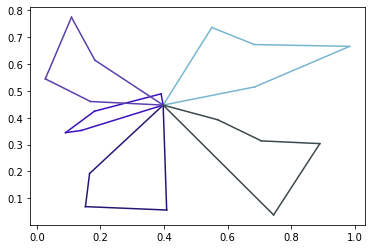

In [66]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)

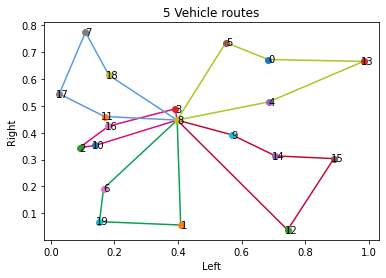

In [67]:
#outline the routes
coloured_loc = [np.random.rand(3) for i in range(len(routes))]
for r,co in zip(routes,coloured_loc):
    for a,b in r:
        l1,l2 = locations[a], locations[b]
        plt.plot([l1[0],l2[0]],[l1[1],l2[1]], color=co)
for l in locations:
    lo = locations[l]
    plt.plot(lo[0],lo[1],'o')
    plt.text(lo[0]+.01,lo[1],l,horizontalalignment='center',verticalalignment='center')
    
    
plt.title('%d '%V + 'Vehicle routes' if V > 1 else 'Vehicle route')
plt.xlabel('Left')
plt.ylabel('Right')
plt.show()

In [68]:
routes

[[(8, 5), (5, 0), (0, 13), (13, 4), (4, 8)],
 [(8, 6), (6, 19), (19, 1), (1, 8)],
 [(8, 10), (10, 2), (2, 16), (16, 3), (3, 8)],
 [(8, 11), (11, 17), (17, 7), (7, 18), (18, 8)],
 [(8, 12), (12, 15), (15, 14), (14, 9), (9, 8)]]

In [69]:
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [70]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = distance
       
    data['num_vehicles'] = 5
    data['depot'] = 8
    return data

In [71]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
       #plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    #print('Maximum of the route distances: {}m'.format(max_route_distance))

In [72]:
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()

Route for vehicle 0:
 8 ->  0 ->  15 ->  14 ->  9 -> 8

Route for vehicle 1:
 8 ->  1 ->  12 -> 8

Route for vehicle 2:
 8 ->  4 ->  13 ->  5 ->  3 -> 8

Route for vehicle 3:
 8 ->  16 ->  10 ->  2 ->  6 ->  19 -> 8

Route for vehicle 4:
 8 ->  18 ->  7 ->  17 ->  11 -> 8



In [73]:
routes

[[(8, 5), (5, 0), (0, 13), (13, 4), (4, 8)],
 [(8, 6), (6, 19), (19, 1), (1, 8)],
 [(8, 10), (10, 2), (2, 16), (16, 3), (3, 8)],
 [(8, 11), (11, 17), (17, 7), (7, 18), (18, 8)],
 [(8, 12), (12, 15), (15, 14), (14, 9), (9, 8)]]

In [81]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    max_route_distance = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += ' {} -> '.format(manager.IndexToNode(index))
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id)
        plan_output += '{}\n'.format(manager.IndexToNode(index))
        plan_output += 'Distance of the route: {}m\n'.format(route_distance)
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print('Maximum of the route distances: {}m'.format(max_route_distance))
def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = 'Distance'
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name)
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
if __name__ == '__main__':
    main()    

Route for vehicle 0:
 8 ->  0 ->  15 ->  14 ->  9 -> 8
Distance of the route: 143m

Route for vehicle 1:
 8 ->  1 ->  12 -> 8
Distance of the route: 139m

Route for vehicle 2:
 8 ->  4 ->  13 ->  5 ->  3 -> 8
Distance of the route: 153m

Route for vehicle 3:
 8 ->  16 ->  10 ->  2 ->  6 ->  19 -> 8
Distance of the route: 119m

Route for vehicle 4:
 8 ->  18 ->  7 ->  17 ->  11 -> 8
Distance of the route: 119m

Maximum of the route distances: 153m


In [84]:
routes

[[(8, 5), (5, 0), (0, 13), (13, 4), (4, 8)],
 [(8, 6), (6, 19), (19, 1), (1, 8)],
 [(8, 10), (10, 2), (2, 16), (16, 3), (3, 8)],
 [(8, 11), (11, 17), (17, 7), (7, 18), (18, 8)],
 [(8, 12), (12, 15), (15, 14), (14, 9), (9, 8)]]

In [85]:
distance[8][5]+distance[5][0]+distance[0][13]+distance[13][4]+distance[4][8]

156.17

In [86]:
distance[8][6]+distance[6][19]+distance[19][1]+distance[1][8]

123.94

In [87]:
distance[8][10]+distance[10][2]+distance[2][16]+distance[16][3]+distance[3][8]

78.6

In [88]:
distance[8][11]+distance[11][17]+distance[17][7]+distance[7][18]+distance[18][8]

120.72

In [89]:
distance[8][12]+distance[12][15]+distance[15][14]+distance[14][9]+distance[9][8]

151.38000000000002

In [90]:
143+139+153+119+119

673

In [91]:
156+124+78+121+151

630

In [161]:
result = pd.DataFrame()
result['OP-Route'] = 78,121,124,151,156
result['OR-Tools'] = 119,119,139,143,153

In [162]:
result

,OP-Route,OR-Tools
0,78,119
1,121,119
2,124,139
3,151,143
4,156,153


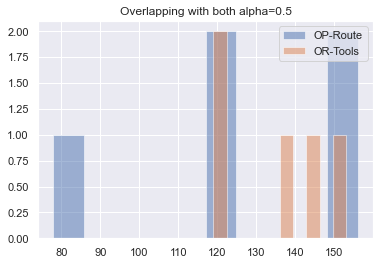

In [163]:
plt.hist(result['OP-Route'], 
         alpha=0.5, # the transaparency parameter
         label='OP-Route')
  
plt.hist(result['OR-Tools'],
         alpha=0.5,
         label='OR-Tools')
  
plt.legend(loc='upper right')
plt.title('Overlapping with both alpha=0.5')
plt.show()

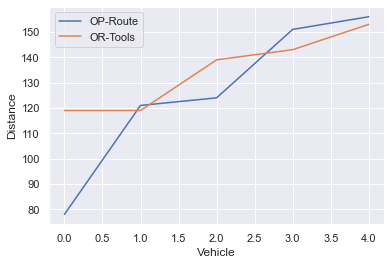

In [164]:
plt.plot(result['OP-Route'], label='OP-Route')
plt.plot(result['OR-Tools'], label='OR-Tools')
plt.xlabel('Vehicle')
plt.ylabel('Distance')
plt.grid(True)
plt.legend()

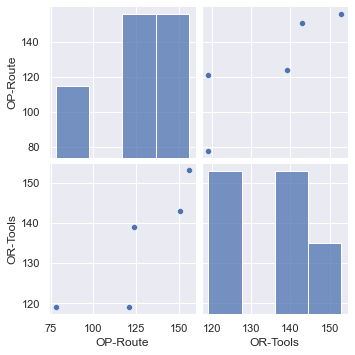

In [165]:
import seaborn as sns
sns.pairplot(result)

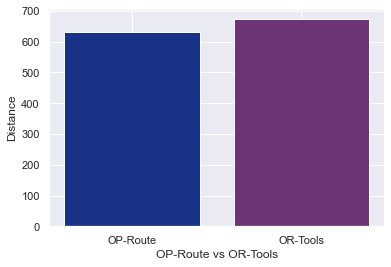

In [166]:
# the first call is as usual
plt.bar('OP-Route',result['OP-Route'].sum(), color="#183386")
plt.bar('OR-Tools',result['OR-Tools'].sum(), color="#6c3376")
plt.xlabel('OP-Route vs OR-Tools')  
plt.ylabel('Distance')

plt.show()  

In [176]:
c_result = pd.DataFrame()
c_result['model'] = 'OP-Route','OP-Route','OP-Route','OP-Route','OP-Route','OR-Tools','OR-Tools','OR-Tools','OR-Tools','OR-Tools'
c_result['Total Distance'] = 78,121,124,151,156,119,119,139,143,153

In [177]:
c_result

,model,Total Distance
0,OP-Route,78
1,OP-Route,121
2,OP-Route,124
3,OP-Route,151
4,OP-Route,156
5,OR-Tools,119
6,OR-Tools,119
7,OR-Tools,139
8,OR-Tools,143
9,OR-Tools,153


<AxesSubplot:xlabel='model', ylabel='Total Distance'>

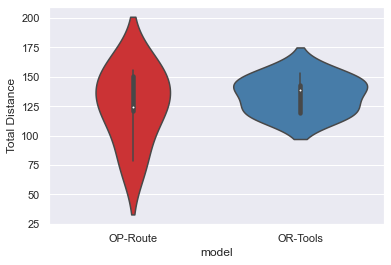

In [178]:
sns.violinplot(x="model", y="Total Distance", data=c_result,palette='Set1')

<AxesSubplot:xlabel='model', ylabel='Total Distance'>

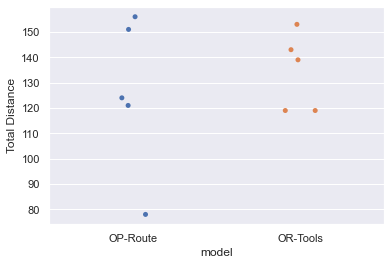

In [179]:
sns.stripplot(x="model", y="Total Distance", data=c_result)

<AxesSubplot:xlabel='model', ylabel='Total Distance'>

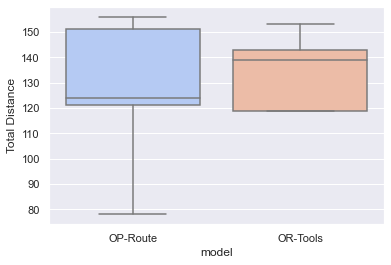

In [181]:
sns.boxplot(x="model", y="Total Distance",data=c_result, palette="coolwarm")

<AxesSubplot:>

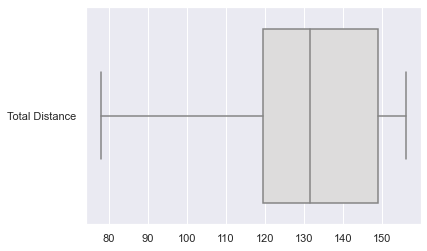

In [196]:
sns.boxplot(data=c_result,palette='coolwarm',orient='h')

<AxesSubplot:xlabel='model', ylabel='Total Distance'>

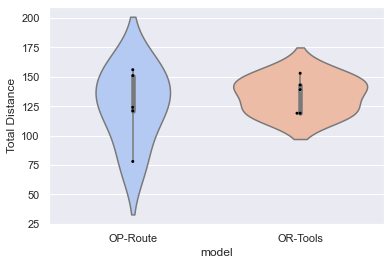

In [194]:
sns.violinplot(x="model", y="Total Distance", data=c_result,palette='coolwarm')
sns.swarmplot(x="model", y="Total Distance", data=c_result,color='black',size=3)

<AxesSubplot:>

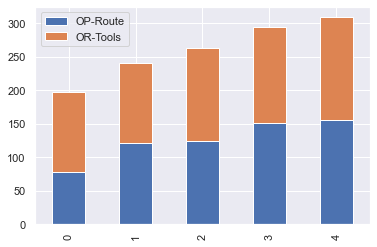

In [186]:
result.plot.bar(stacked=True)

<AxesSubplot:ylabel='Density'>

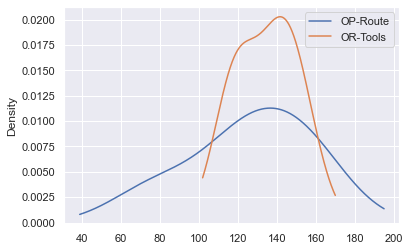

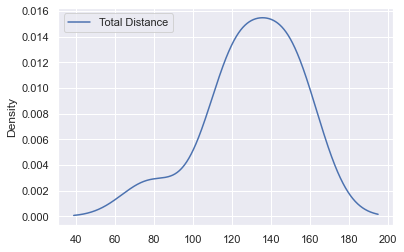

In [193]:
result.plot.density()
c_result.plot.density()

<AxesSubplot:>

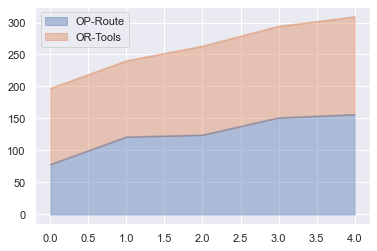

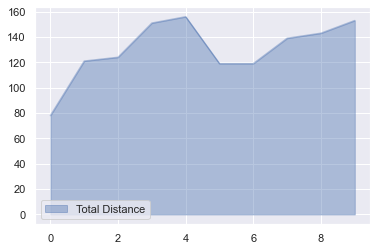

In [192]:
result.plot.area(alpha=0.4)
c_result.plot.area(alpha=0.4)